<a href="https://colab.research.google.com/github/MilkButterCheese/UOS_ComputationalPhysics/blob/master/Week8_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(0.6370000000000005, 0.6380000000000005)
0.9994979706604283


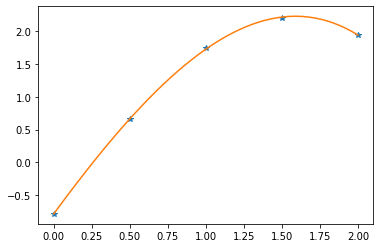

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import sys
sys.path.append('/content/drive/MyDrive/ComputatinalPhysics/myModules')
from scipy.optimize import root_scalar

#Problem 1
data= np.genfromtxt('/content/drive/MyDrive/ComputatinalPhysics/Week8/3.1_5.dat',delimiter=',')
x=data[0,:]
y=data[1,:]
n=len(x)
xx=np.linspace(x[0],x[-1],n*10)
#보간법 사용하기
f= UnivariateSpline(x,y)
yy=f(xx)
plt.plot(x,y,'*')
plt.plot(xx,yy)
#근 찾기
def g(x):
    return f(x) -1 
dx=0.001    
root1=rootsearch(g,0,2,dx)
print(root1) #f(x)=1이되는 x=0.637
print(f(0.637))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from  scipy.interpolate import CubicSpline
import sys
sys.path.append('/content/drive/MyDrive/ComputatinalPhysics/myModules')
from ch3 import *
from rootsearch import *
from scipy.optimize import root_scalar

# problem2
# phi= pi일떄 V=pi*(r^2)*L로 꽉찬 상태. 따라서 3/4만큼 찾다는 식은
# 3*pi/4 = phi-*(1-h/r) sin(phi)로 표현됨
# t=h/r임
def f(t):
    phi= np.arccos(1-t)
    return phi-(1-t)*np.sin(phi)-3*np.pi/4

dx=0.001    
root1=rootsearch(f,0,2,dx)
print(root1) # t= h/r=1.4034



(1.4029999999999563, 1.4039999999999562)


    fjac: array([[-0.95259689,  0.30423539],
       [-0.30423539, -0.95259689]])
     fun: array([-9.99200722e-16,  1.88737914e-15])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([ 3.82930077e-11, -3.56798519e-11])
       r: array([-2.60865668,  0.08419698,  3.07496405])
  status: 1
 success: True
       x: array([0.88159259, 0.21359471])
0.21359470345402465
3.0618225964800194
3.606473075734584e-08
1.7807887706111636e-07


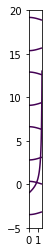

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from  scipy.interpolate import CubicSpline
import sys
sys.path.append('/content/drive/MyDrive/ComputatinalPhysics/myModules')
from ch3 import *
from rootsearch import *
from scipy.optimize import root
# problem3
xdata= np.linspace(0,1.5,150)
ydata= np.linspace(-5,20,1500)
X, Y = np.meshgrid(xdata,ydata)
#함수 정의하기
def f1(x,y):
    return np.tan(x)-y-1 

def f2(x,y):
    return np.cos(x)- 3* np.sin(y)

F1=f1(X,Y)
F2=f2(X,Y)
#그래프 그리기
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_aspect('equal')
plt.contour(X,Y,F1,[0])
plt.contour(X,Y,F2,[0])

#root(func,xini)
x0=[0,1]
sol= root(func,x0)
print(sol)
#x=[0.88159259,1.32940213, 3.21855398]
#y값구하기
def g1(x):
    return np.tan(x)-1    
print(g1(0.88159259))
print(g1(1.32940213))
#y=[0.21359470345402465, 3.0618225964800194  ]

#다시 검증하기
print(f2(0.88159259,0.21359470345402465))
print(f2(1.32940213,3.0618225964800194))


In [ ]:
import numpy as np
from scipy.optimize import fsolve
# problem4
# #함수 정의하기
def equations(p):
    x, y1 ,y2 ,y3 = p
    f1= x*(-np.tan(y2)+np.tan(y1))-16
    f2= x*(np.tan(y2)+np.tan(y3))-20
    f3= -4*np.sin(y1)-6*np.sin(y2)+5*np.sin(y3)+3
    f4= 4*np.cos(y1) +6*np.cos(y2) +5*np.cos(y3)-12
    return (f1,f2,f3,f4)

#근 찾기
T,theta1,theta2,theta3 = fsolve(equations,(1,0.5,0.5,0.5))
print(T,theta1,theta2,theta3)
#[T1,theta1,theta2,theta3]=[17.888408954907284 0.9358027517346257 0.4334498815383086 0.5800495389897659]


17.888408954907284 0.9358027517346257 0.4334498815383086 0.5800495389897659
